# Explore here

### STEP 1: Importing the File

In [2]:
import requests

# URL del archivo CSV
URL = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

#Access route
file_path = "/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv"

#Download file
response = requests.get(URL)

#Opens the path (WB= Write mode/Binay) in a safe way. And used the GET
with open(file_path, "wb") as file:
    file.write(response.content)

print(f"File downloaded in: {file_path}")

File downloaded in: /workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv


In [3]:
'''READ THE CSV FILE'''
import pandas as pd

# Define the file path
file_path = "/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv"

# Load the CSV file into a DataFrame
Total_data = pd.read_csv(file_path, index_col=False)

## STEP 2: EXPLORING AND DATA CLEANING

In [4]:
# Display the info
print(f'Total data Shape: {Total_data.shape}')
print(Total_data.info())

Total data Shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  la

This tells us that the DataFrame contains 48895 rows and 16 columns, and that 3 Floats, 7 ints and 6 objects.
We Can also see that there are NaN values in name, host name, last_review, and reviews_per_month.

-Categorical Values(7): id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type 

-Numerical Values(9): latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365



In [5]:
#Eliminate duplicates

# Check for duplicates
duplicate_rows = Total_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
Total_data.drop("id", axis=1).duplicated().sum()

#Eliminate irrelevant information
irrelevant_columns = ['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month']  
Total_data_cleaned = Total_data.drop(columns=irrelevant_columns)

print(f"Shape after dropping irrelevant columns: {Total_data_cleaned.shape}")

print(Total_data_cleaned.head(10))

Number of duplicate rows: 0
Shape after dropping irrelevant columns: (48895, 10)
  neighbourhood_group       neighbourhood  latitude  longitude  \
0            Brooklyn          Kensington  40.64749  -73.97237   
1           Manhattan             Midtown  40.75362  -73.98377   
2           Manhattan              Harlem  40.80902  -73.94190   
3            Brooklyn        Clinton Hill  40.68514  -73.95976   
4           Manhattan         East Harlem  40.79851  -73.94399   
5           Manhattan         Murray Hill  40.74767  -73.97500   
6            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8           Manhattan     Upper West Side  40.80178  -73.96723   
9           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   


## STEP 3: Analysis of univariate variables
### Analysis on Categorical Variables

In [6]:
#Unique values for each categorical variable
print(f"Unique values in 'neighbourhood_group': {Total_data_cleaned['neighbourhood_group'].unique()}")
print(f"Unique values in 'neighbourhood': {Total_data_cleaned['neighbourhood'].nunique()}")  
print(f"Unique values in 'room_type': {Total_data_cleaned['room_type'].unique()}")

Unique values in 'neighbourhood_group': ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values in 'neighbourhood': 221
Unique values in 'room_type': ['Private room' 'Entire home/apt' 'Shared room']


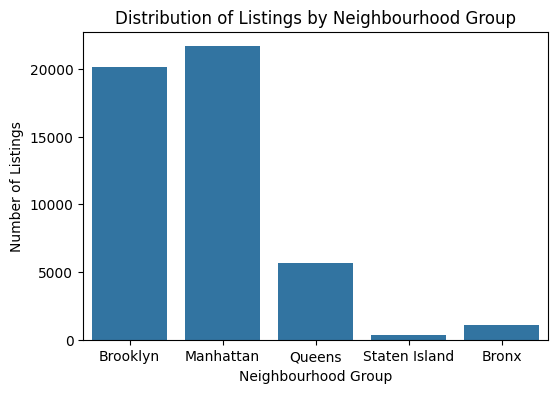

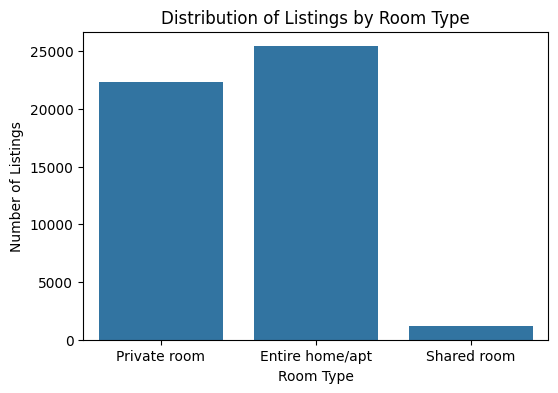

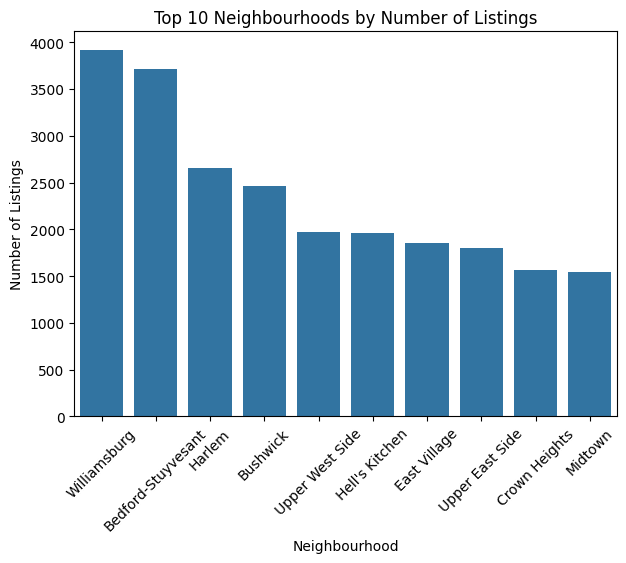

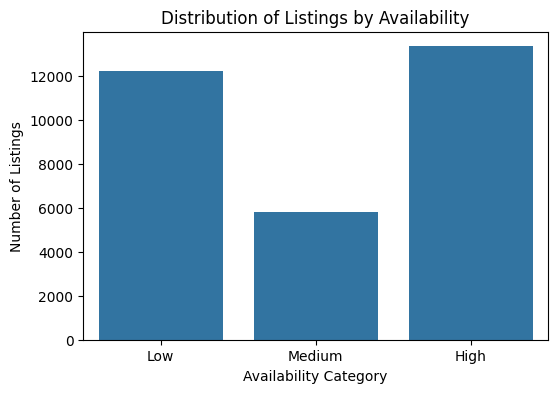

In [7]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Neighbourhood_group
plt.figure(figsize=(6, 4))
sns.countplot(x='neighbourhood_group', data=Total_data_cleaned)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.show()

#Room Type
plt.figure(figsize=(6, 4))
sns.countplot(x='room_type', data=Total_data_cleaned)
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings by Room Type')
plt.show()

#Neighbourhood - Top 10
top_10_neighbourhoods = Total_data_cleaned['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(7, 5))
sns.barplot(x=top_10_neighbourhoods.index, y=top_10_neighbourhoods.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.show()

#Availability - Categorize for better visualization
#Categorized availability_365: Low (0-100), Medium (101-200), High (201-365)
availability_bins = [0, 100, 200, 365]
availability_labels = ['Low', 'Medium', 'High']
Total_data_cleaned['availability_category'] = pd.cut(Total_data_cleaned['availability_365'], bins=availability_bins, labels=availability_labels)

#Availability 365
plt.figure(figsize=(6, 4))
sns.countplot(x='availability_category', data=Total_data_cleaned, order=['Low', 'Medium', 'High'])
plt.xlabel('Availability Category')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings by Availability')
plt.show()

Conclusions: 
-Brooklyn and Manhattan have the highest number of listings, with the other boroughs—Queens, Staten Island, and Bronx—having significantly fewer listings.
-Entire homes/apartments are the most common type of listing, followed closely by private rooms, while shared rooms are rare.
-Neighborhoods like Williamsburg and Bedford-Stuyvesant in Brooklyn, and Harlem in Manhattan, have the highest number of Airbnb listings, making them the most popular areas for Airbnb rentals.

### Analysis of Numerical Values

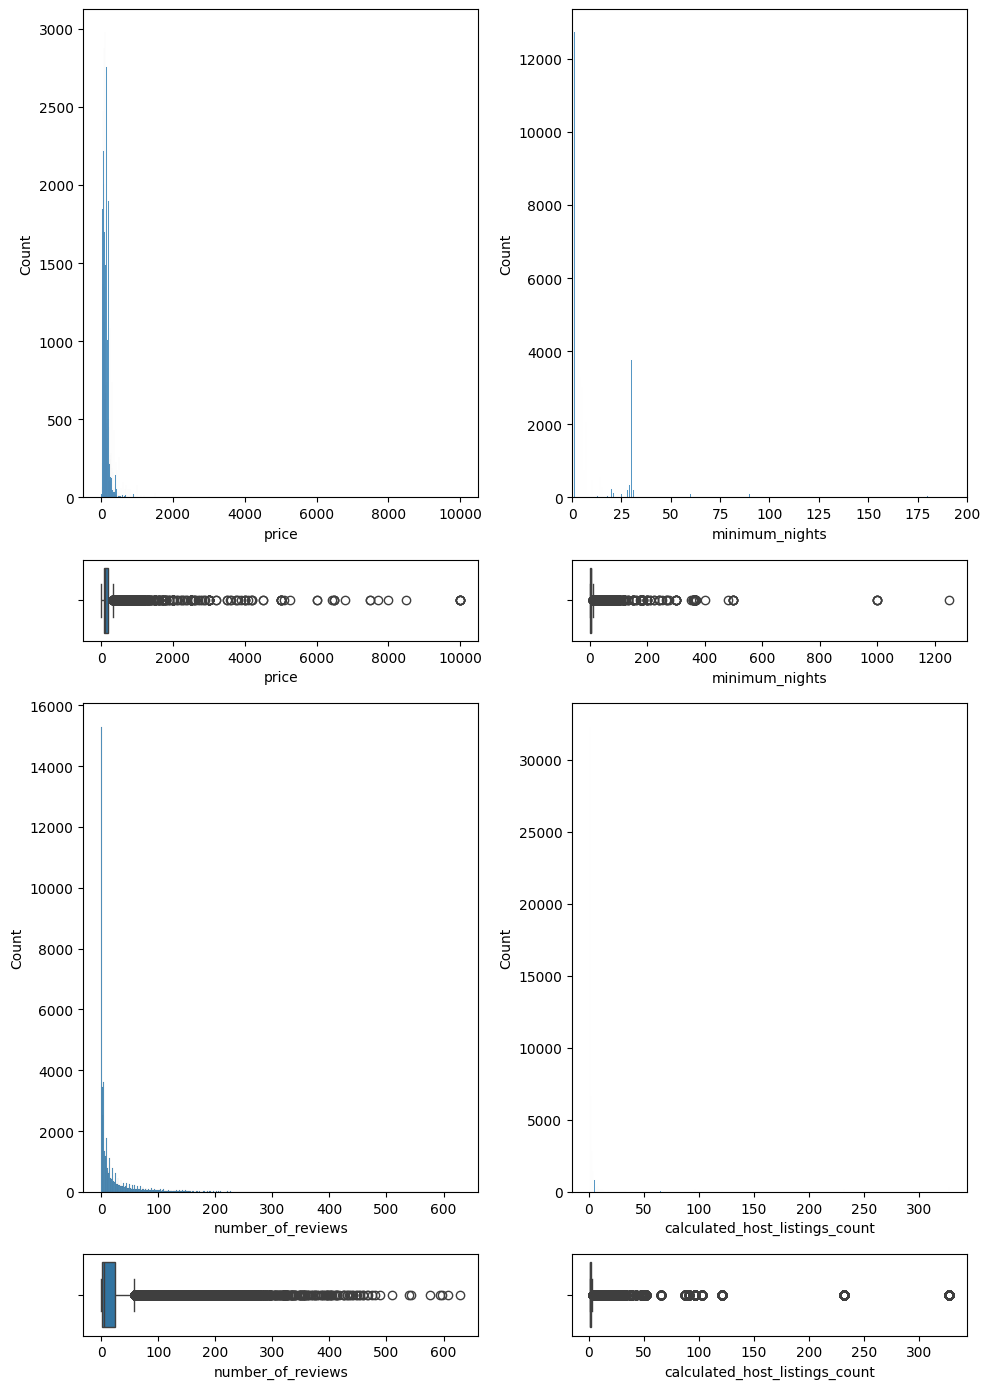

In [8]:
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Price
sns.histplot(ax=axis[0, 0], data=Total_data_cleaned, x="price")
sns.boxplot(ax=axis[1, 0], data=Total_data_cleaned, x="price")

# Minimum nights
sns.histplot(ax=axis[0, 1], data=Total_data_cleaned, x="minimum_nights").set_xlim(0, 200)
sns.boxplot(ax=axis[1, 1], data=Total_data_cleaned, x="minimum_nights")

# Number of reviews
sns.histplot(ax=axis[2, 0], data=Total_data_cleaned, x="number_of_reviews")
sns.boxplot(ax=axis[3, 0], data=Total_data_cleaned, x="number_of_reviews")

# Calculated host listings count
sns.histplot(ax=axis[2, 1], data=Total_data_cleaned, x="calculated_host_listings_count")
sns.boxplot(ax=axis[3, 1], data=Total_data_cleaned, x="calculated_host_listings_count")

plt.tight_layout()
plt.show()

The histograms and boxplots show that price has a highly skewed distribution, with most listings priced below $1000, but a few extreme outliers go up to $10,000. Similarly, minimum nights has most listings requiring fewer than 30 nights, but there are some extreme values requiring much longer stays. 

Number of reviews shows that most listings have fewer than 100 reviews, but some popular ones have over 600 reviews. Lastly, the calculated host listings count shows that while most hosts manage a few listings, some have over 200, indicating large property managers. These variables all exhibit significant outliers.

## STEP 4: Analysis of multivariate variables
### Numerical-numerical analysis

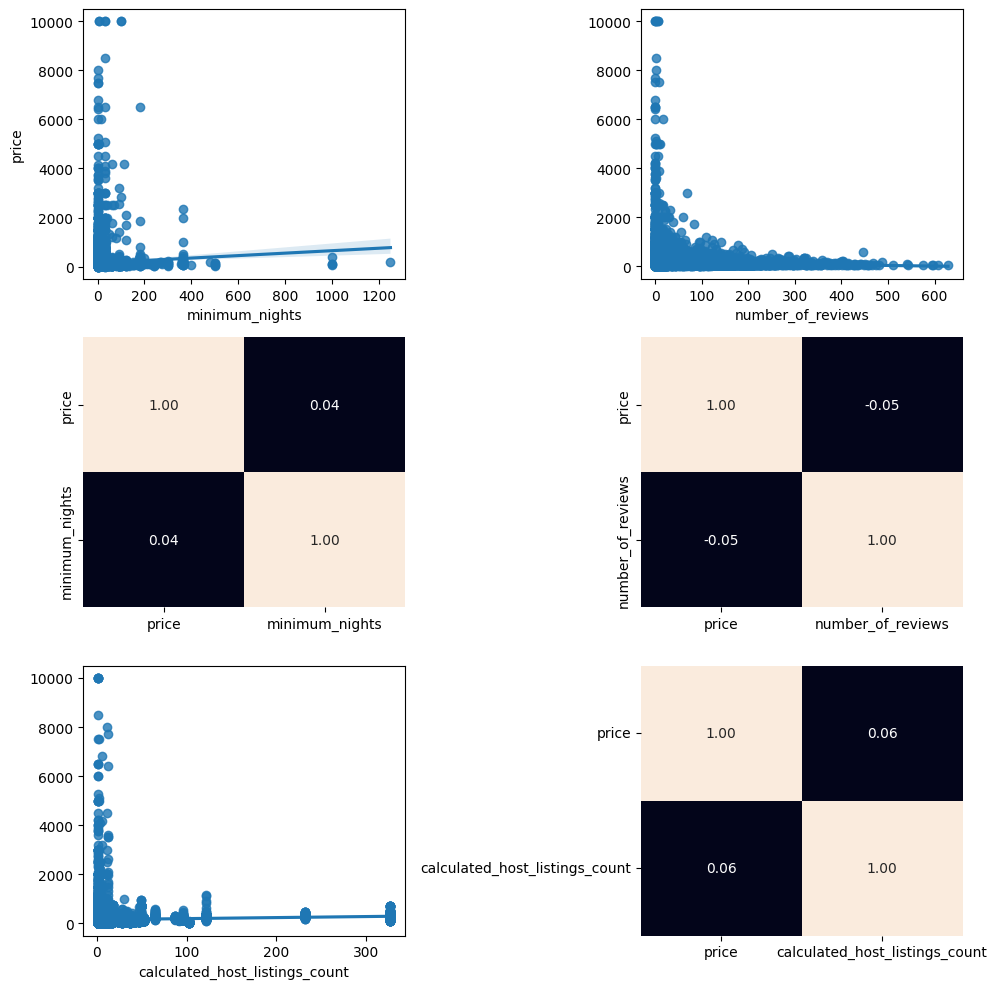

In [9]:
#Numerical - Numerical Analysis

fig, axis = plt.subplots(3, 2, figsize=(10, 10))

#Price vs Minimum Nights
sns.regplot(ax=axis[0, 0], data=Total_data_cleaned, x="minimum_nights", y="price")
sns.heatmap(Total_data_cleaned[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

#Price vs Number of Reviews
sns.regplot(ax=axis[0, 1], data=Total_data_cleaned, x="number_of_reviews", y="price").set(ylabel=None)
sns.heatmap(Total_data_cleaned[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

#Price vs Calculated Host Listings Count
sns.regplot(ax=axis[2, 0], data=Total_data_cleaned, x="calculated_host_listings_count", y="price").set(ylabel=None)
sns.heatmap(Total_data_cleaned[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

plt.tight_layout()
plt.show()

Conclusions: The correlation analysis shows very weak correlations between price and the other numerical variables (minimum_nights, number_of_reviews, calculated_host_listings_count), with all values close to 0. This suggests that these variables do not have a significant impact on the pricing of Airbnb listings in New York City.

### Categorical- Categorical Analysis

/tmp/ipykernel_684/3212177387.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45)
/tmp/ipykernel_684/3212177387.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=45)
/tmp/ipykernel_684/3212177387.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1, 0].set_xticklabels(axis[1, 0].get_xticklabels(), rotation=45)
/tmp/ipykernel_684/3212177387.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1, 1].set_xticklabels(axis[1, 1].get_xticklabels(), rotation=45)


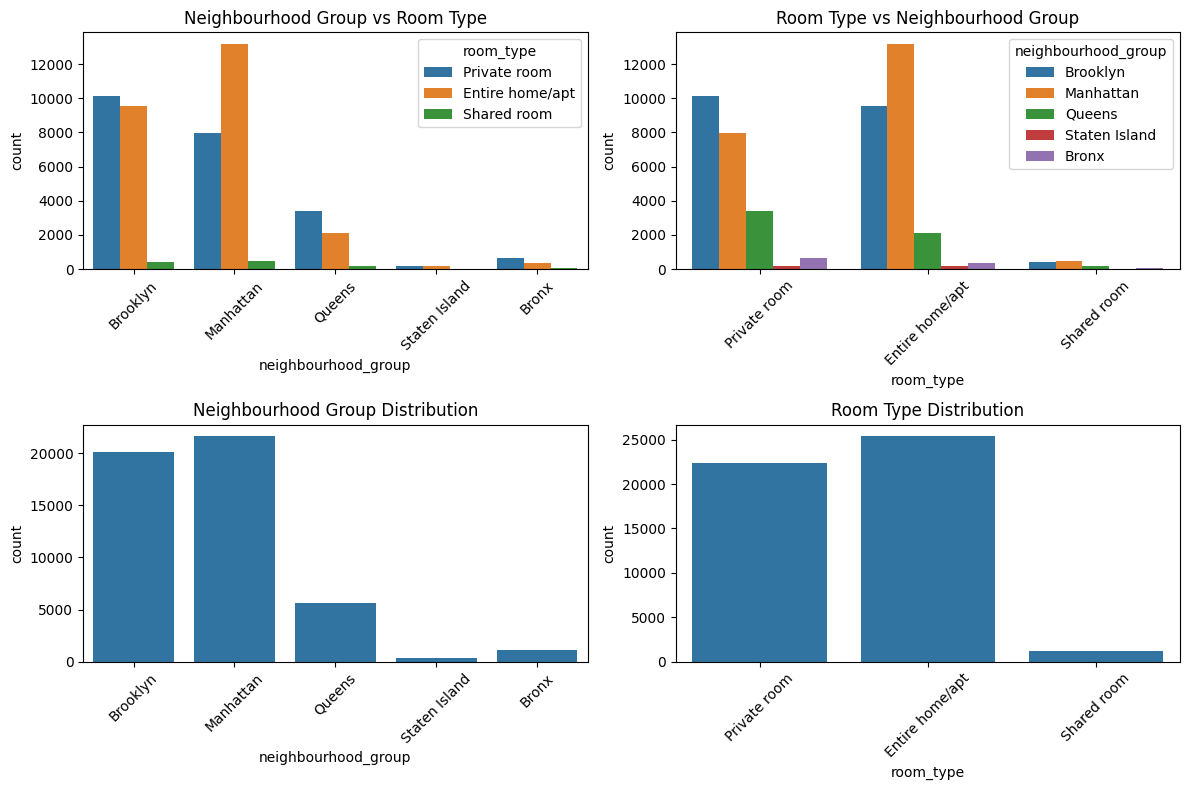

In [10]:
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

#Neighbourhood_group vs room_type
sns.countplot(ax=axis[0, 0], data=Total_data_cleaned, x="neighbourhood_group", hue="room_type")
axis[0, 0].set_title("Neighbourhood Group vs Room Type")
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45)

#Room_type vs neighbourhood_group
sns.countplot(ax=axis[0, 1], data=Total_data_cleaned, x="room_type", hue="neighbourhood_group")
axis[0, 1].set_title("Room Type vs Neighbourhood Group")
axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=45)

#Neighbourhood_group vs neighbourhood 
sns.countplot(ax=axis[1, 0], data=Total_data_cleaned, x="neighbourhood_group")
axis[1, 0].set_title("Neighbourhood Group Distribution")
axis[1, 0].set_xticklabels(axis[1, 0].get_xticklabels(), rotation=45)

#Room_type distribution
sns.countplot(ax=axis[1, 1], data=Total_data_cleaned, x="room_type")
axis[1, 1].set_title("Room Type Distribution")
axis[1, 1].set_xticklabels(axis[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Conclusions: 
Room Type vs Neighbourhood Group:
Manhattan and Brooklyn dominate in the number of listings for both private rooms and entire apartments.
Queens has a smaller number of listings, with more private rooms compared to entire homes/apartments.
Shared rooms are scarce across all neighbourhoods, with only small numbers present, especially in Manhattan and Brooklyn.

Neighbourhood Group vs Room Type:
Brooklyn and Manhattan have a nearly equal number of listings for private rooms and entire homes/apartments.
Staten Island and the Bronx have very few listings, mostly private rooms.
Manhattan has a higher concentration of entire home/apartment listings compared to Brooklyn.

# Numerical-categorical analysis (complete)

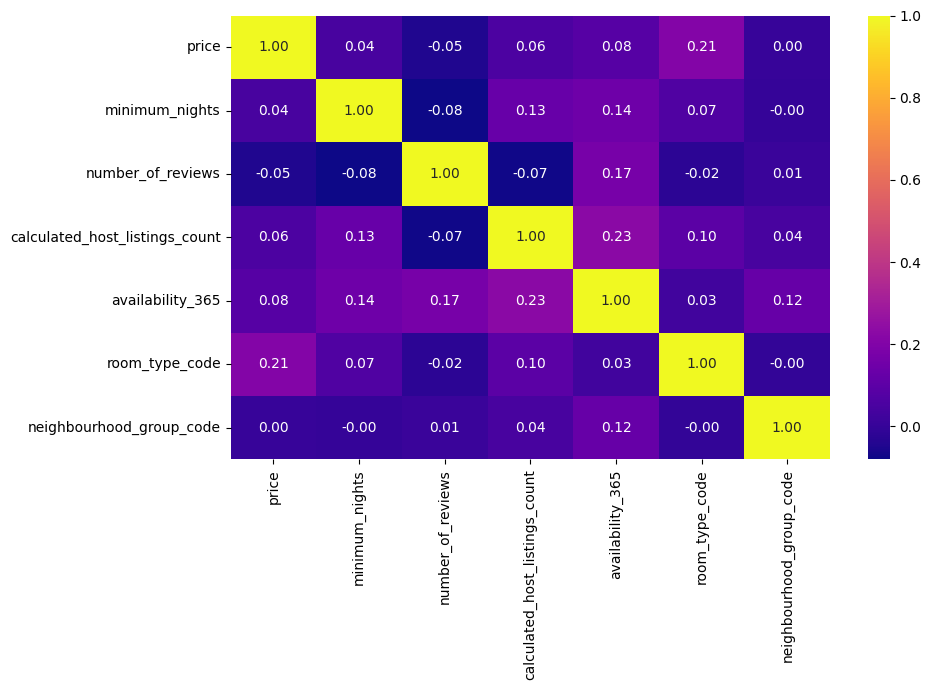

In [11]:
#Factorize the room_type and neighbourhood_group
Total_data_cleaned['room_type_code'], _ = pd.factorize(Total_data_cleaned['room_type'])
Total_data_cleaned['neighbourhood_group_code'], _ = pd.factorize(Total_data_cleaned['neighbourhood_group'])

# Now create the heatmap with these factorized codes
fig, axis = plt.subplots(figsize=(10, 7))

# Create a heatmap for correlation between numeric and factorized categorical variables
sns.heatmap(Total_data_cleaned[["price", "minimum_nights", "number_of_reviews", 
                                "calculated_host_listings_count", "availability_365", 
                                "room_type_code", "neighbourhood_group_code"]].corr(), 
            annot=True, fmt=".2f", cmap="plasma")

plt.tight_layout()
plt.show()

### All data at once

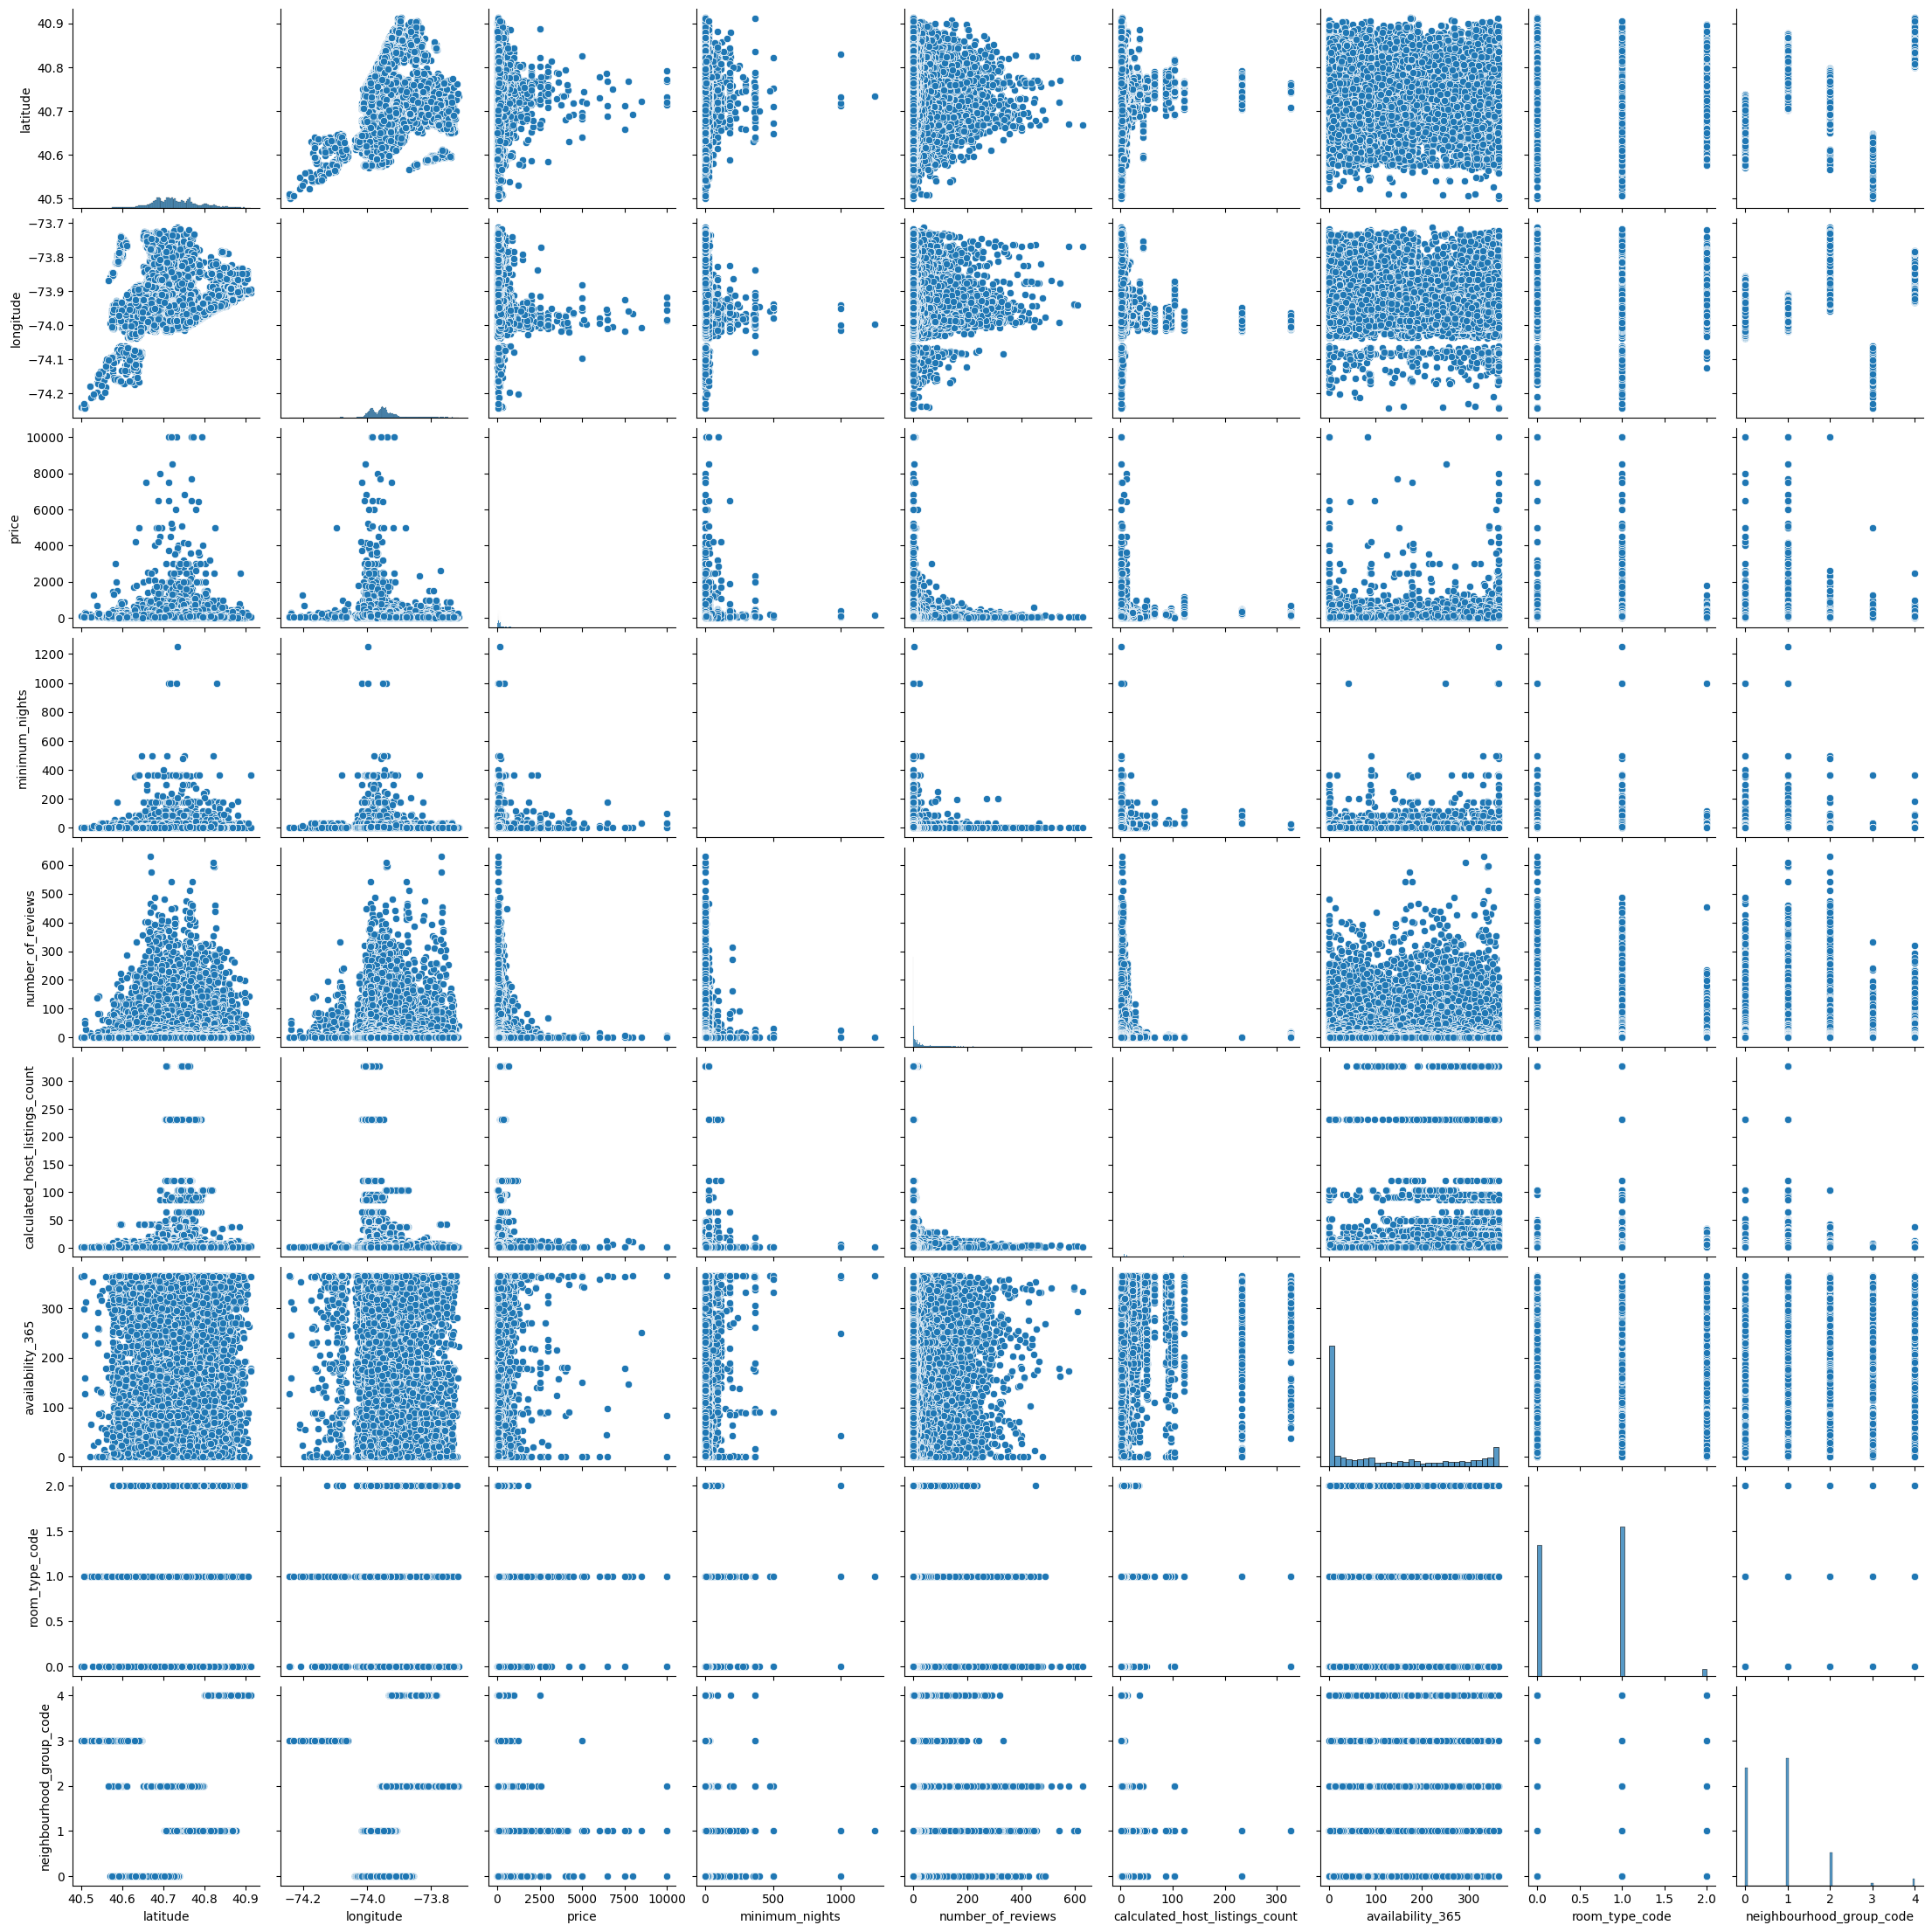

In [12]:
sns.pairplot(data = Total_data_cleaned)

Day 2
## STEP 5: Feature Engineering
### Outlier analysis

In [ ]:
Total_data_cleaned.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_group_code
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000


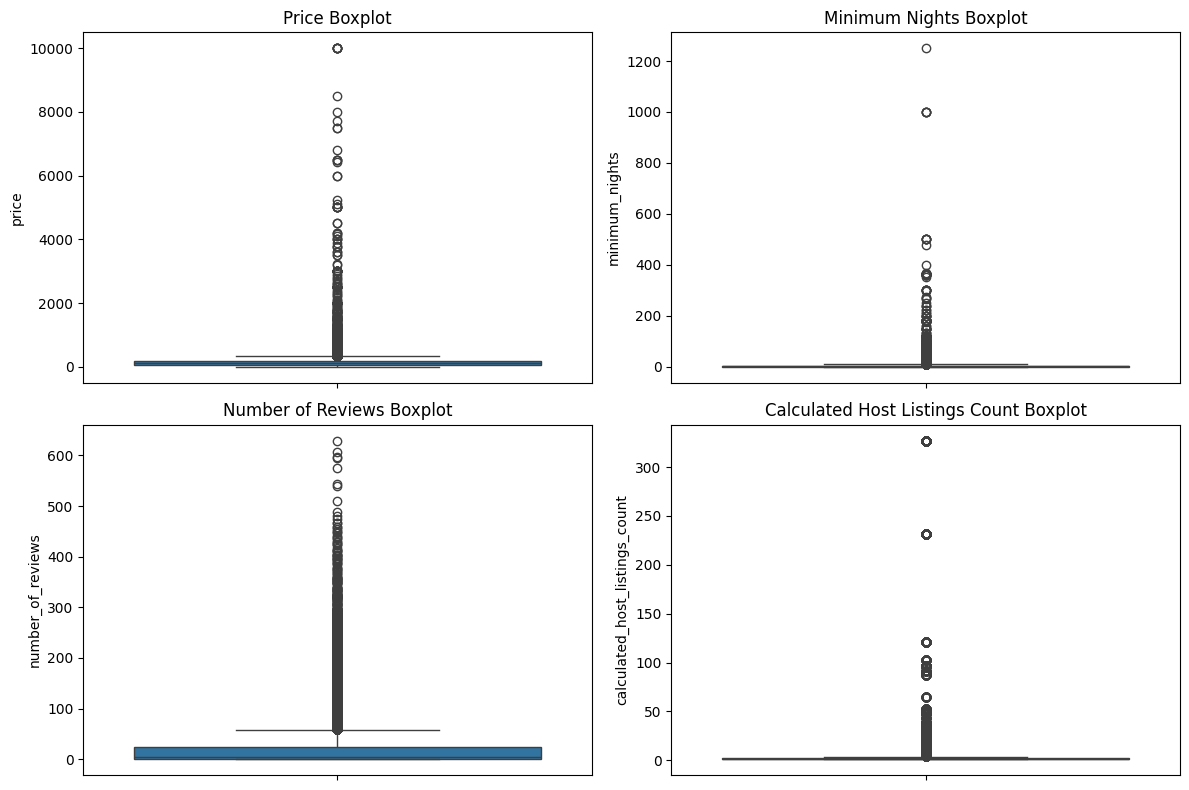

In [14]:
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

#Price
sns.boxplot(ax=axis[0, 0], data=Total_data_cleaned, y="price")
axis[0, 0].set_title("Price Boxplot")

#Minimum Nights
sns.boxplot(ax=axis[0, 1], data=Total_data_cleaned, y="minimum_nights")
axis[0, 1].set_title("Minimum Nights Boxplot")

#Number of Reviews
sns.boxplot(ax=axis[1, 0], data=Total_data_cleaned, y="number_of_reviews")
axis[1, 0].set_title("Number of Reviews Boxplot")

#Calculated Host Listings Count
sns.boxplot(ax=axis[1, 1], data=Total_data_cleaned, y="calculated_host_listings_count")
axis[1, 1].set_title("Calculated Host Listings Count Boxplot")

plt.tight_layout()
plt.show()

In [17]:
#Make copies of the dataset
Total_data_cleaned_with_outl = Total_data_cleaned.copy()
Total_data_cleaned_without_outl = Total_data_cleaned.copy()

In [18]:
#PRICE
price_stats = Total_data_cleaned['price'].describe()

#IQR for price
price_iqr = price_stats["75%"] - price_stats["25%"]

#Outlier limits
upper_limit_price = price_stats["75%"] + 1.5 * price_iqr
lower_limit_price = max(0, price_stats["25%"] - 1.5 * price_iqr)

print(f"The upper and lower limits for finding outliers are {round(upper_limit_price, 2)} and {round(lower_limit_price, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and 0, with an interquartile range of 106.0


In [20]:
#Capping method for outliers
Total_data_cleaned_without_outl['price'] = Total_data_cleaned_without_outl['price'].apply(
    lambda x: upper_limit_price if x > upper_limit_price else (lower_limit_price if x < lower_limit_price else x)
)
Total_data_cleaned_without_outl['price'].describe()

count    48895.000000
mean       132.979753
std         83.530504
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64

In [21]:
#MINIMUM_NIGHTS
min_nights_stats = Total_data_cleaned['minimum_nights'].describe()

#IQR for minimum_nights
min_nights_iqr = min_nights_stats["75%"] - min_nights_stats["25%"]

#Outlier limits
upper_limit_min_nights = min_nights_stats["75%"] + 1.5 * min_nights_iqr
lower_limit_min_nights = max(0, min_nights_stats["25%"] - 1.5 * min_nights_iqr)  # Ensure lower limit is not negative

print(f"The upper limit for minimum nights is {round(upper_limit_min_nights, 2)}, and the lower limit is {round(lower_limit_min_nights, 2)}. The IQR is {round(min_nights_iqr, 2)}.")

#Statistics before capping
print("\nSummary statistics for 'minimum_nights' before capping outliers:")
print(Total_data_cleaned_without_outl['minimum_nights'].describe())

#Capping method for outliers
Total_data_cleaned_without_outl['minimum_nights'] = Total_data_cleaned_without_outl['minimum_nights'].apply(
    lambda x: upper_limit_min_nights if x > upper_limit_min_nights else (lower_limit_min_nights if x < lower_limit_min_nights else x)
)

#Statistics after capping
print("Summary statistics for 'minimum_nights' after capping outliers:")
print(Total_data_cleaned_without_outl['minimum_nights'].describe())

The upper limit for minimum nights is 11.0, and the lower limit is 0. The IQR is 4.0.

Summary statistics for 'minimum_nights' before capping outliers:
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64
Summary statistics for 'minimum_nights' after capping outliers:
count    48895.00000
mean         3.82532
std          3.32072
min          1.00000
25%          1.00000
50%          3.00000
75%          5.00000
max         11.00000
Name: minimum_nights, dtype: float64


In [22]:
#NUMBER_OF_REVIEWS
reviews_stats = Total_data_cleaned['number_of_reviews'].describe()

#IQR for number_of_reviews
reviews_iqr = reviews_stats["75%"] - reviews_stats["25%"]

#Outlier limits
upper_limit_reviews = reviews_stats["75%"] + 1.5 * reviews_iqr
lower_limit_reviews = max(0, reviews_stats["25%"] - 1.5 * reviews_iqr)  # Ensure lower limit is not negative

#Outlier boundaries
print(f"The upper limit for number of reviews is {round(upper_limit_reviews, 2)}, and the lower limit is {round(lower_limit_reviews, 2)}. The IQR is {round(reviews_iqr, 2)}.")


print("\nSummary statistics for 'number_of_reviews' before capping outliers:")
print(Total_data_cleaned_without_outl['number_of_reviews'].describe())


Total_data_cleaned_without_outl['number_of_reviews'] = Total_data_cleaned_without_outl['number_of_reviews'].apply(
    lambda x: upper_limit_reviews if x > upper_limit_reviews else (lower_limit_reviews if x < lower_limit_reviews else x)
)

print("\nSummary statistics for 'number_of_reviews' after capping outliers:")
print(Total_data_cleaned_without_outl['number_of_reviews'].describe())

The upper limit for number of reviews is 58.5, and the lower limit is 0. The IQR is 23.0.

Summary statistics for 'number_of_reviews' before capping outliers:
count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

Summary statistics for 'number_of_reviews' after capping outliers:
count    48895.00000
mean        15.67419
std         20.34953
min          0.00000
25%          1.00000
50%          5.00000
75%         24.00000
max         58.50000
Name: number_of_reviews, dtype: float64


In [23]:
#calculated_host_listings_count
host_listings_stats = Total_data_cleaned['calculated_host_listings_count'].describe()

#IQR for calculated_host_listings_count
host_listings_iqr = host_listings_stats["75%"] - host_listings_stats["25%"]

#Outlier limits
upper_limit_host_listings = host_listings_stats["75%"] + 1.5 * host_listings_iqr
lower_limit_host_listings = max(0, host_listings_stats["25%"] - 1.5 * host_listings_iqr)  # Ensure lower limit is not negative


print(f"The upper limit for calculated host listings count is {round(upper_limit_host_listings, 2)}, and the lower limit is {round(lower_limit_host_listings, 2)}. The IQR is {round(host_listings_iqr, 2)}.")


print("\nSummary statistics for 'calculated_host_listings_count' before capping outliers:")
print(Total_data_cleaned_without_outl['calculated_host_listings_count'].describe())


Total_data_cleaned_without_outl['calculated_host_listings_count'] = Total_data_cleaned_without_outl['calculated_host_listings_count'].apply(
    lambda x: upper_limit_host_listings if x > upper_limit_host_listings else (lower_limit_host_listings if x < lower_limit_host_listings else x)
)

print("\nSummary statistics for 'calculated_host_listings_count' after capping outliers:")
print(Total_data_cleaned_without_outl['calculated_host_listings_count'].describe())

The upper limit for calculated host listings count is 3.5, and the lower limit is 0. The IQR is 1.0.

Summary statistics for 'calculated_host_listings_count' before capping outliers:
count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

Summary statistics for 'calculated_host_listings_count' after capping outliers:
count    48895.000000
mean         1.614920
std          0.946883
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: calculated_host_listings_count, dtype: float64


### Missing value analysis

In [24]:
Total_data_cleaned.isnull().sum().sort_values(ascending=False)

availability_category             17533
neighbourhood                         0
latitude                              0
longitude                             0
neighbourhood_group                   0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
room_type_code                        0
neighbourhood_group_code              0
dtype: int64

Here I found the only Missing values are in availability_category, but it was created from availability_365 to get a better view

### Feture scaling

In [25]:
#Split data
from sklearn.model_selection import train_test_split

num_variables = ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]

#Define the predictor variables (X) and target variable (y)
X = Total_data_cleaned_without_outl[num_variables]  
y = Total_data_cleaned_without_outl['price']  

#Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data (Unscaled):")
print(X_train.head())

Training Data (Unscaled):
       price  minimum_nights  number_of_reviews  \
32645  295.0             3.0               11.0   
23615   70.0             2.0                2.0   
31183   58.0             2.0                0.0   
29260   75.0             3.0               58.5   
7275    38.0             5.0               13.0   

       calculated_host_listings_count  
32645                             1.0  
23615                             1.0  
31183                             2.0  
29260                             1.0  
7275                              1.0  


In [26]:
#Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit the scaler to the training data and transform it
X_train_norm = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

#Same transformation to the test data
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

print("\nNormalized Training Data:")
print(X_train_norm.head())


Normalized Training Data:
          price  minimum_nights  number_of_reviews  \
32645  1.933011       -0.251775          -0.231781   
23615 -0.755968       -0.552471          -0.673438   
31183 -0.899380       -0.552471          -0.771584   
29260 -0.696213       -0.251775           2.099188   
7275  -1.138401        0.349619          -0.133635   

       calculated_host_listings_count  
32645                       -0.649717  
23615                       -0.649717  
31183                        0.406112  
29260                       -0.649717  
7275                        -0.649717  


In [27]:
#MIN-MAX
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_scal = minmax_scaler.fit_transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=num_variables)

#Same transformation to the test data
X_test_scal = minmax_scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=num_variables)

print("\nMin-Max Scaled Training Data:")
print(X_train_scal.head())


Min-Max Scaled Training Data:
          price  minimum_nights  number_of_reviews  \
32645  0.883234             0.2           0.188034   
23615  0.209581             0.1           0.034188   
31183  0.173653             0.1           0.000000   
29260  0.224551             0.2           1.000000   
7275   0.113772             0.4           0.222222   

       calculated_host_listings_count  
32645                             0.0  
23615                             0.0  
31183                             0.4  
29260                             0.0  
7275                              0.0  


## STEP 6: Feature selection

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
# Initialize SelectKBest with k=2 (picking top 2 features)
k_best = SelectKBest(score_func=f_classif, k=2)

# Fit the SelectKBest to the data
k_best.fit(X, y)

# Get the selected features
selected_features = k_best.get_support(indices=True)  # Get index of selected features
selected_feature_names = X.columns[selected_features]  # Get names of selected features

print("Selected Features:", list(selected_feature_names))

Selected Features: ['price', 'calculated_host_listings_count']


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [29]:
# Transform the original data to only include selected features
X_selected = X.iloc[:, selected_features]

print("\nData with Selected Features:")
print(X_selected.head())


Data with Selected Features:
   price  calculated_host_listings_count
0  149.0                             3.5
1  225.0                             2.0
2  150.0                             1.0
3   89.0                             1.0
4   80.0                             1.0


To conclude the analysis, it appears that price was included as predictor, which may have influenced the feature selection results. Ideally, price should be excluded from the predictors to avoid overfitting, as it is the target variable we are aiming to predict. 

Moreover, an important insight emerged from the feature selection, calculated_host_listings_count was identified as a key predictor, indicating that hosts with multiple listings can significantly impact pricing strategies. This suggests that hosts with a higher number of listings may follow distinct pricing patterns, reflecting an experienced approach to managing accommodations. Finally, hosts with higher listing counts might demonstrate different pricing dynamics compared to those with fewer listings, highlighting a key aspect of market behavior in this dataset.

Next steps involve re-running the feature selection process without including price as a predictor. Additionally, we may adjust the k parameter to explore the top features in more detail. Finally, the insights gained from this analysis will serve as a foundation for deeper exploration and refined predictive modeling.